<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/CatResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import ResNet50

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
directory = "/gdrive/MyDrive/cat database/images"

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = data_gen.flow_from_directory(
  directory,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary',
  subset='training',
  shuffle=True)

Found 518 images belonging to 2 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(
  directory,
  target_size=(224, 224),
  batch_size=8,
  class_mode='binary',
  subset='validation',
  shuffle=False)

Found 128 images belonging to 2 classes.


In [ ]:
input_shape, num_classes = (224, 224, 3), 1

In [ ]:
input = Input(shape=input_shape)

base_model = ResNet50(include_top=False, pooling="avg", weights="imagenet")(input)
dense_layer = Dense(64, activation='relu')(base_model)
output_layer = Dense(num_classes, activation='sigmoid')(dense_layer)

model = Model(inputs=input, outputs=output_layer)
model.layers[0].trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23718913 (90.48 MB)
Trainable params: 23665793 (90.28 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
fit_history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

<ipython-input-14-6a2829a8601d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/100
33/33 [==============================] - 169s 4s/step - loss: 0.5089 - accuracy: 0.7394 - precision: 0.7168 - recall: 0.7915 - val_loss: 0.7027 - val_accuracy: 0.5234 - val_precision: 0.5172 - val_recall: 0.7031
Epoch 2/100
33/33 [==============================] - 7s 212ms/step - loss: 0.1657 - accuracy: 0.9575 - precision: 0.9611 - recall: 0.9537 - val_loss: 0.7317 - val_accuracy: 0.4844 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 6s 190ms/step - loss: 0.0684 - accuracy: 0.9942 - precision: 0.9961 - recall: 0.9923 - val_loss: 1.0432 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 7s 198ms/step - loss: 0.0440 - accuracy: 0.9961 - precision: 0.9923 - recall: 1.0000 - val_loss: 1.2854 - val_accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
33/33 [==============================] - 6s 190ms/step - loss: 0.

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


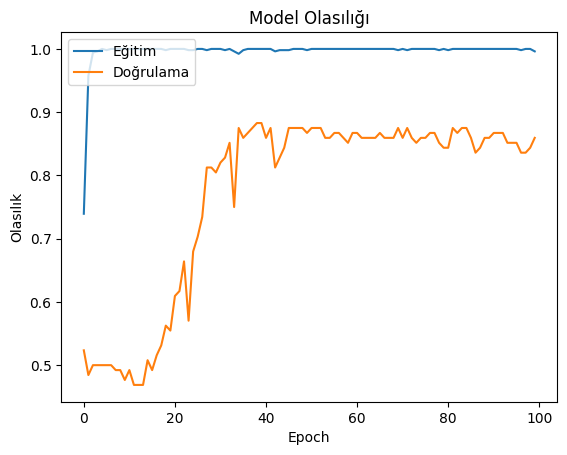

In [ ]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Olasılığı')
plt.ylabel('Olasılık')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

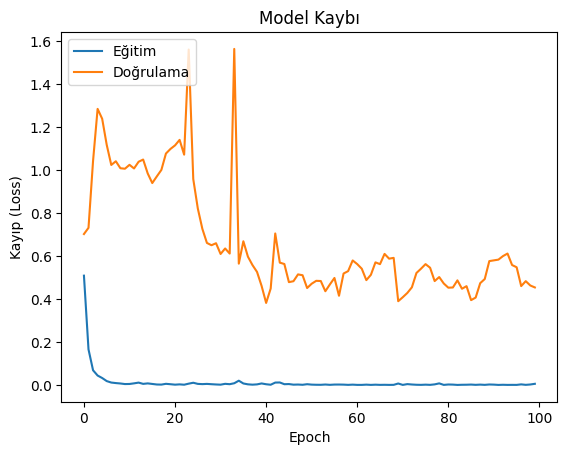

In [ ]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, precision, recall = model.evaluate(val_generator)

16/16 [==============================] - 1s 43ms/step - loss: 0.4541 - accuracy: 0.8594 - precision: 0.9423 - recall: 0.7656


In [ ]:
F1_Skoru = ((precision * recall) / (precision + recall)) * 2
F1_Skoru

0.8448275935777443

In [ ]:
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred = np.round(y_pred)
confusion_matrisi = confusion_matrix(y_true, y_pred)
print(confusion_matrisi)

16/16 [==============================] - 1s 33ms/step
[[61  3]
 [15 49]]
